# 1. Write a program that will automatically load data from files named daneXX.txt one by one and perform the remaining tasks. Propose and implement a division of this data into training and test data.
Napisz program który automatycznie będzie wczytywał po koleji dane z plików daneXX.txt i wykonywał resztę zadań. Zaproponuj i zrealizuj podział tych danych na dane treningowe i dane testowe.

# 2. Propose a linear parametric model Model 1. Determine the model parameters using the method of least squares for the training data.
Zaproponuj liniowy model parametryczny Model 1. Określ parametry modelu stosując metodę najmniejszych kwadratów dla danych treningowych,

In [1]:
import numpy as np


def lin_reg_ls(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_x2 = sum(x ** 2)
    sum_xy = sum(x * y)

    w1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    w0 = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x ** 2)

    return w1, w0

# 3. Verify the correctness of Model 1.
Zweryfikuj poprawność Modelu 1,

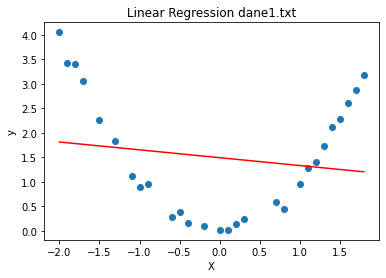

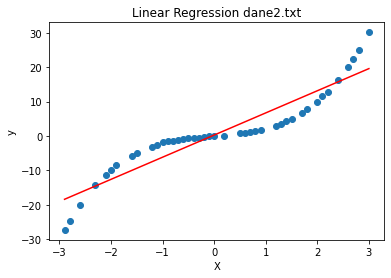

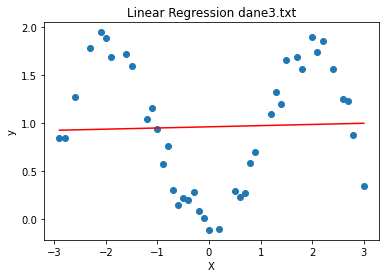

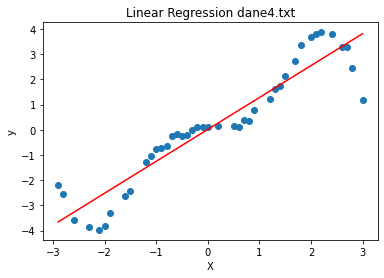

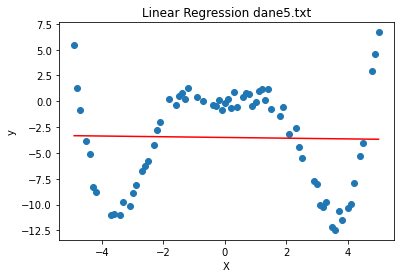

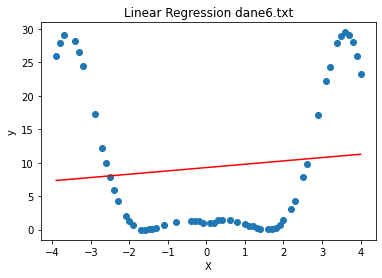

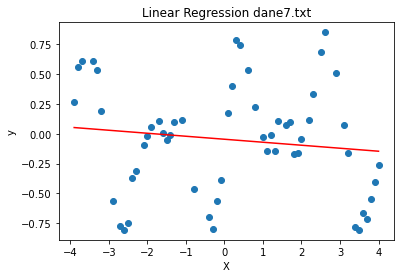

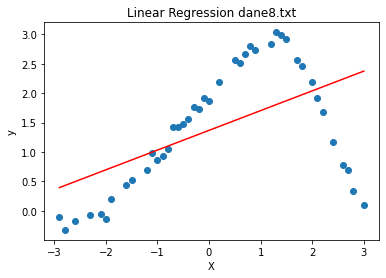

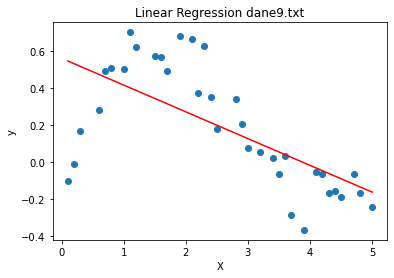

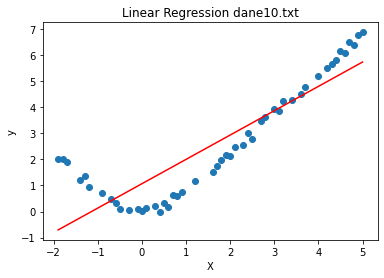

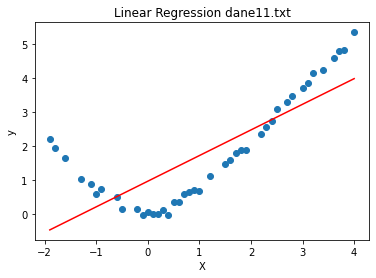

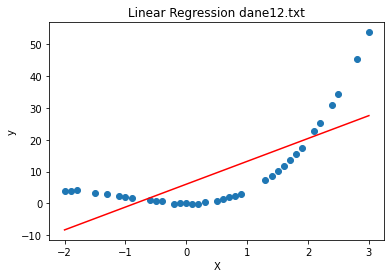

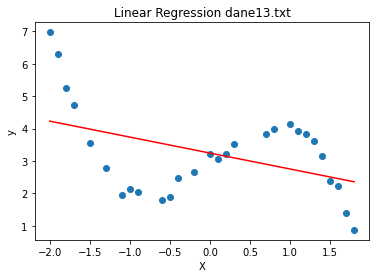

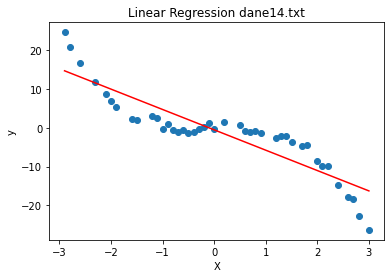

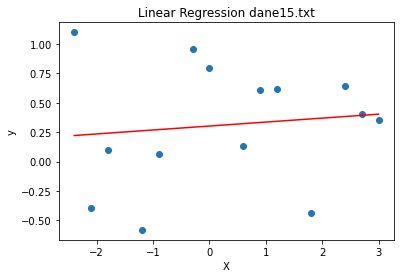

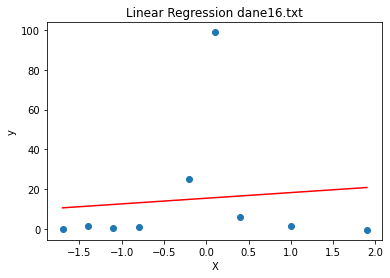

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Looping over 16 files
for i in range(16):
    # Defining the filename for each iteration
    filename = 'dane{}.txt'.format(i + 1)

    # Loading data from the file into numpy array
    file = np.loadtxt('Dane/' + filename)

    # Splitting the loaded data into features (X) and target (y) variables
    X = file[:, [0]]
    y = file[:, [1]]

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Calculating the least square linear regression parameters
    w1, w0 = lin_reg_ls(X_train, y_train)

    # Creating the model for the training data
    model = w1 * X_train + w0

    # Creating the regression line for plotting
    x_plot = np.linspace(min(X_train), max(X_train), 100)
    y_plot = w1 * x_plot + w0

    # Plotting the training data and the regression line
    plt.scatter(X_train, y_train)  # Scatter plot of training data
    plt.plot(x_plot, y_plot, color='red')  # Regression line
    plt.xlabel('X')  # Label for x-axis
    plt.ylabel('y')  # Label for y-axis
    plt.title('Linear Regression {}'.format(filename))  # Title of the plot
    plt.show()

# 4. Propose a more complex, at least 3-degree, non-linear regression Model 2. Determine the model parameters using the least squares method for training data.
Zaproponuj bardziej złożony, minimum 3 stopnia, model regresji nieliniowej Model 2. Określ parametry modelu stosując metodę najmniejszych kwadratów dla danych treningowych,

In [3]:
# Define a function for least squares non-linear regression
def nonlin_reg_ls(x, y, degree=3):
    # Generate a matrix, where each column is the input raised to a power ranging from 'degree' to 0 (inclusive)
    c = np.hstack([x ** (degree - i) for i in range(degree)] + [np.ones(x.shape)])

    # Compute the pseudo-inverse of 'c' and multiply it with 'y' to get the vector of coefficients 'v'
    v = np.linalg.pinv(c) @ y

    return v

# Define a function to compute the predicted values using the non-linear regression model
def nonlin_reg_model(x, w):
    # The degree of the polynomial is one less than the number of coefficients
    degree = len(w) - 1

    # Compute the predicted value as the sum of each coefficient times the input raised to the corresponding power
    return sum([w[i] * x ** (degree - i) for i in range(degree + 1)])

# model = w3*X_train^3 + w2*X_train^2+w1*X_Train+w0

# 5. Verify the correctness of Model 2.
Zweryfikuj poprawność Modelu 2,

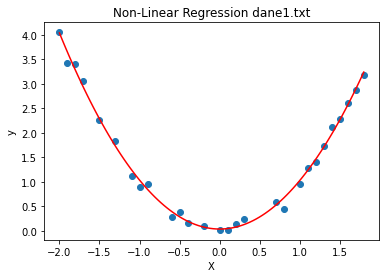

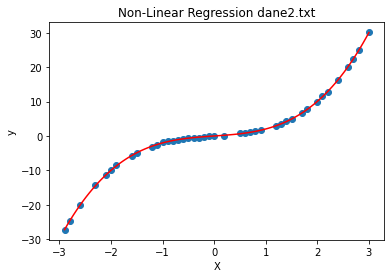

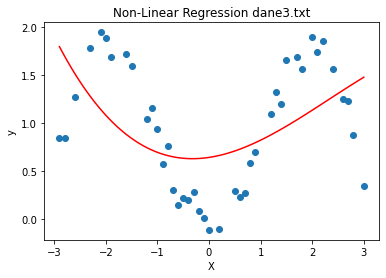

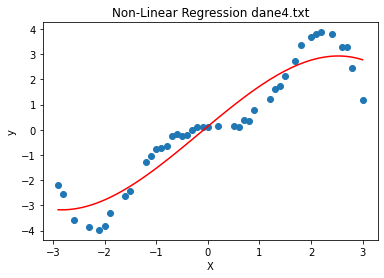

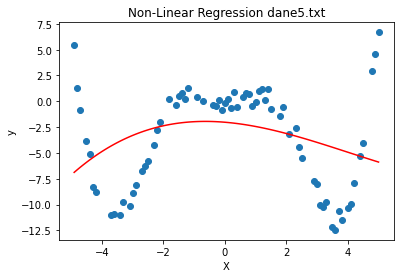

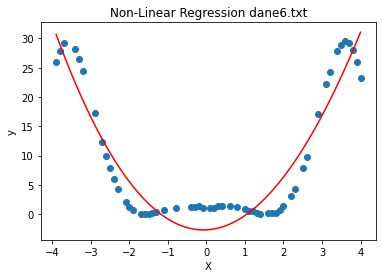

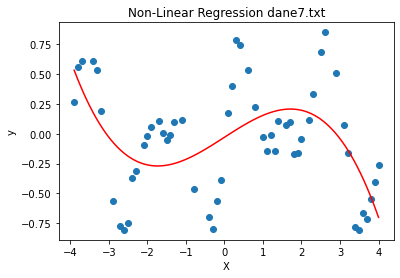

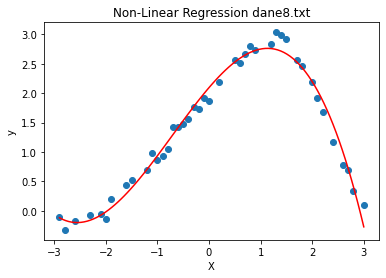

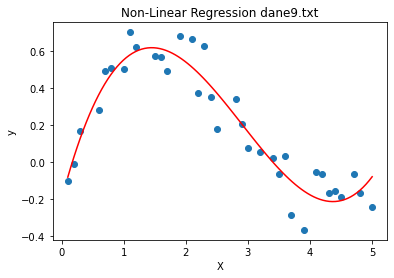

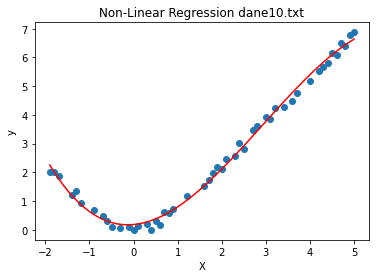

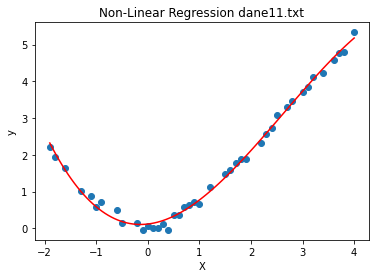

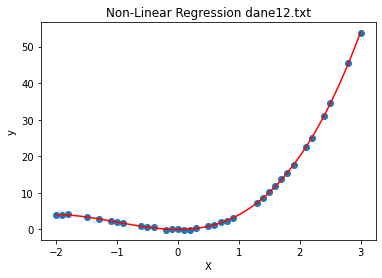

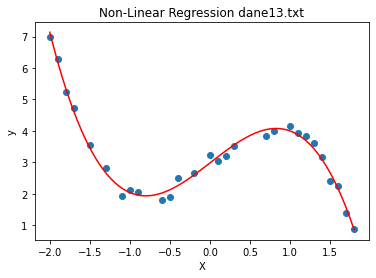

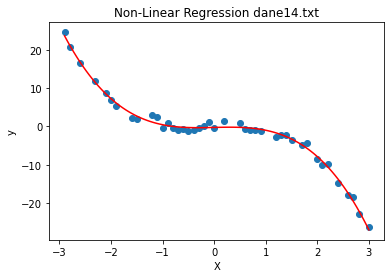

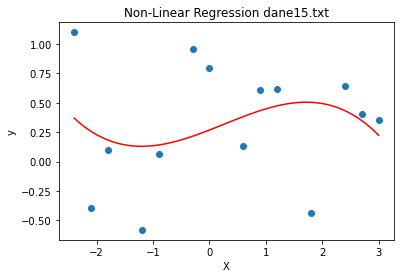

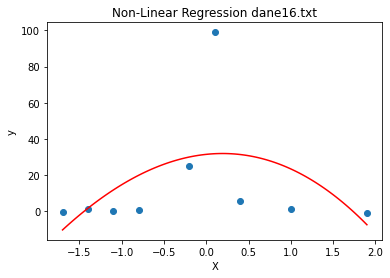

In [5]:
# Looping over 16 files
for i in range(16):
    # Defining the filename for each iteration
    filename = 'dane{}.txt'.format(i + 1)

    # Loading data from the file into numpy array
    file = np.loadtxt('Dane/' + filename)

    # Splitting the loaded data into features (X) and target (y) variables
    X = file[:, [0]]
    y = file[:, [1]]

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Calculating the coefficients of the 3rd degree polynomial regression using the least squares method
    w3, w2, w1, w0 = nonlin_reg_ls(X_train, y_train)

    # Generating x values for the regression line
    x_plot = np.linspace(min(X_train), max(X_train), 100)

    # Computing the corresponding y values for the regression line
    y_plot = [nonlin_reg_model(x, [w3, w2, w1, w0]) for x in x_plot]

    # Plotting the training data and the regression line
    plt.scatter(X_train, y_train)
    plt.plot(x_plot, y_plot, color='red')  # Regression line
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Non-Linear Regression ' + filename)
    plt.show()

# 6. Compare both models
Porównaj oba modele.

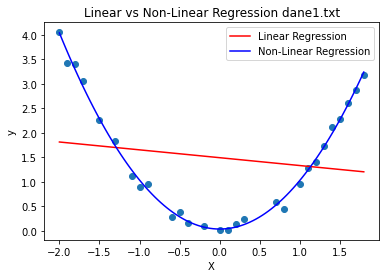

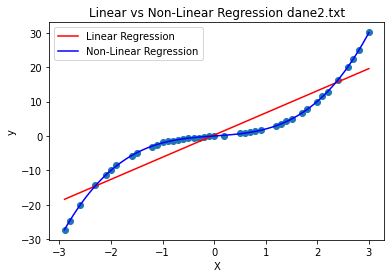

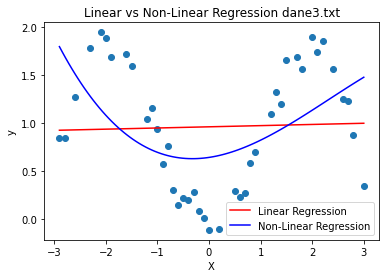

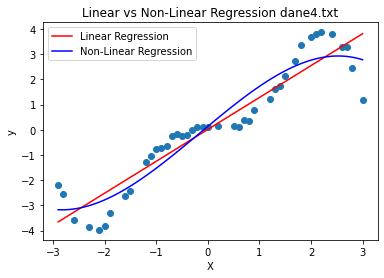

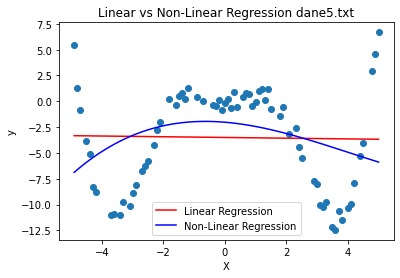

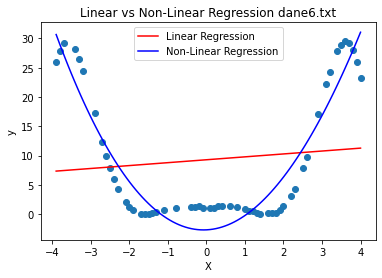

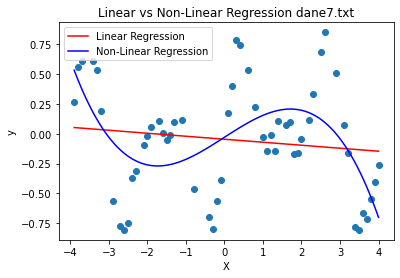

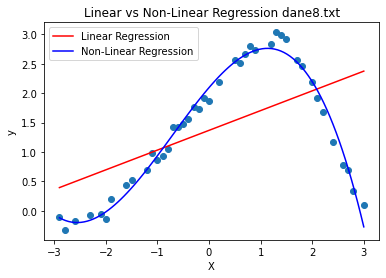

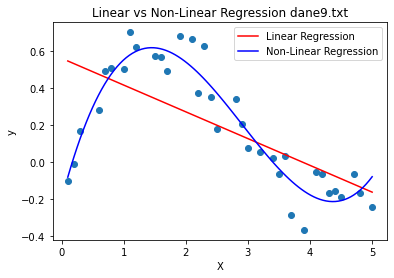

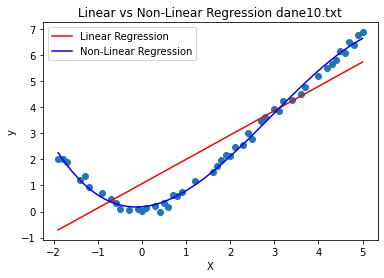

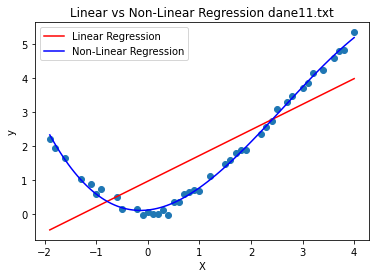

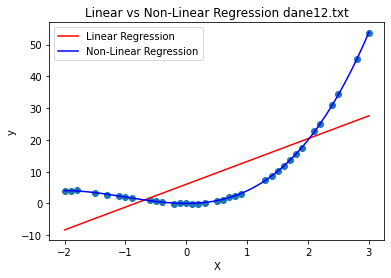

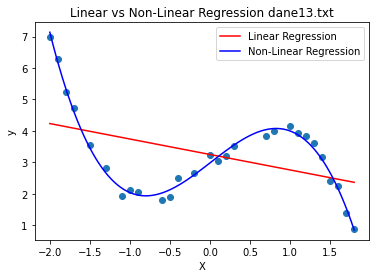

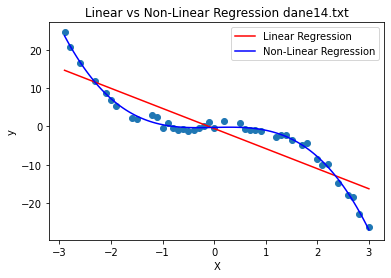

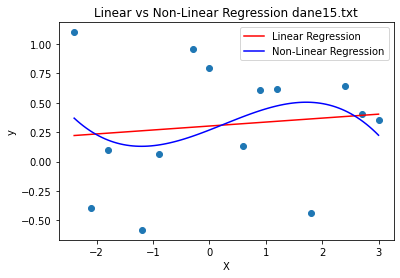

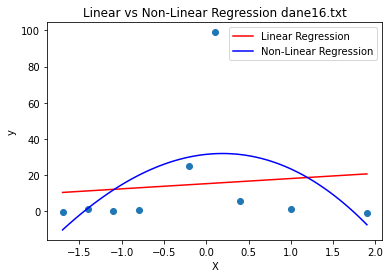

In [6]:
# Import numpy for array operations
import numpy as np

# Looping over 16 files
for i in range(16):
    # Defining the filename for each iteration
    filename = 'dane{}.txt'.format(i + 1)

    # Loading data from the file into numpy array
    file = np.loadtxt('Dane/' + filename)

    # Splitting the loaded data into features (X) and target (y) variables
    X = file[:, [0]]
    y = file[:, [1]]

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Calculating the coefficients of the linear regression using the least squares method
    w1, w0 = lin_reg_ls(X_train, y_train)

    # Calculating the coefficients of the 3rd degree polynomial regression using the least squares method
    w3, w2, w1_poly, w0_poly = nonlin_reg_ls(X_train, y_train)

    # Generating x values for the regression lines
    x_plot = np.linspace(min(X_train), max(X_train), 100)

    # Computing the corresponding y values for the linear regression line
    y_plot_linear = w1 * x_plot + w0

    # Computing the corresponding y values for the polynomial regression line
    y_plot_poly = [nonlin_reg_model(x, [w3, w2, w1_poly, w0_poly]) for x in x_plot]

    # Plotting the training data
    plt.scatter(X_train, y_train)

    # Plotting the linear regression line
    plt.plot(x_plot, y_plot_linear, color='red', label='Linear Regression')

    # Plotting the non-linear regression line
    plt.plot(x_plot, y_plot_poly, color='blue', label='Non-Linear Regression')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear vs Non-Linear Regression ' + filename)
    plt.legend()
    plt.show()